# Country based song popularity analysis

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import matplotlib.dates as mdates
import plotly.express as px
from plotly.subplots import make_subplots
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 5000)
%matplotlib inline

In [ ]:
path_to_protocol5='dataset_\dataset_cleaned_popularity.pkl'

In [ ]:
df

,country,uri,popularity,title,artist,release_type,sub_genre,artist_followers,explicit,album,release_date,track_number,tracks_in_album,danceability,energy,key,loudness,mode,speechiness,acoustics,instrumentalness,liveness,valence,tempo,time_signature,genre,days_since_release,released_after_2017,explicit_false,explicit_true,popu_max,top10_dummy,top50_dummy,cluster,duration_min,release_year,release_month,release_day
0,Global,https://open.spotify.com/track/6FyRXC8tJUh863J...,31833.95,adan y eva,Paulo Londra,single,argentine hip hop,11427104.0,False,Adan y Eva,2018-11-05,1,1,0.767,0.709,1,-4.470,1,0.3360,0.3230,0.000000,0.0676,0.720,171.993,4,hip hop,740.0,1.0,1,0,10,1.0,1.0,global,4.310650,2018,11,5
1,USA,https://open.spotify.com/track/6FyRXC8tJUh863J...,8.00,adan y eva,Paulo Londra,single,argentine hip hop,11427104.0,False,Adan y Eva,2018-11-05,1,1,0.767,0.709,1,-4.470,1,0.3360,0.3230,0.000000,0.0676,0.720,171.993,4,hip hop,740.0,1.0,1,0,191,0.0,0.0,english speaking and nordic,4.310650,2018,11,5
2,Argentina,https://open.spotify.com/track/6FyRXC8tJUh863J...,76924.40,adan y eva,Paulo Londra,single,argentine hip hop,11427104.0,False,Adan y Eva,2018-11-05,1,1,0.767,0.709,1,-4.470,1,0.3360,0.3230,0.000000,0.0676,0.720,171.993,4,hip hop,740.0,1.0,1,0,1,1.0,1.0,spanish speaking,4.310650,2018,11,5
3,Belgium,https://open.spotify.com/track/6FyRXC8tJUh863J...,849.60,adan y eva,Paulo Londra,single,argentine hip hop,11427104.0,False,Adan y Eva,2018-11-05,1,1,0.767,0.709,1,-4.470,1,0.3360,0.3230,0.000000,0.0676,0.720,171.993,4,hip hop,740.0,1.0,1,0,126,0.0,0.0,english speaking and nordic,4.310650,2018,11,5
4,Switzerland,https://open.spotify.com/track/6FyRXC8tJUh863J...,20739.10,adan y eva,Paulo Londra,single,argentine hip hop,11427104.0,False,Adan y Eva,2018-11-05,1,1,0.767,0.709,1,-4.470,1,0.3360,0.3230,0.000000,0.0676,0.720,171.993,4,hip hop,740.0,1.0,1,0,21,0.0,1.0,english speaking and nordic,4.310650,2018,11,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166676,Taiwan,https://open.spotify.com/track/6QRRl9Yr0k88RlO...,123.20,不好說,HAOR,single,taiwan pop,2014.0,False,不好說,2018-06-26,1,1,0.751,0.361,10,-8.667,1,0.0531,0.4140,0.000000,0.0894,0.569,92.053,4,pop,872.0,1.0,1,0,112,0.0,0.0,english speaking and nordic,3.310550,2018,6,26
166677,Taiwan,https://open.spotify.com/track/4v29A51TqtD2KFS...,31.20,smalltown,Luke Christopher,single,indie pop rap,152740.0,True,SmallTown,2017-07-07,1,1,0.617,0.598,6,-6.677,1,0.1000,0.1480,0.000000,0.3330,0.526,79.974,4,pop,1226.0,1.0,0,1,162,0.0,0.0,english speaking and nordic,2.347083,2017,7,7
166678,Taiwan,https://open.spotify.com/track/7InvbALrXpsz58J...,156.00,灰狼,G.E.M.,album,mandopop,1225408.0,False,摩天動物園,2019-12-26,7,13,0.679,0.602,5,-8.849,0,0.1480,0.0952,0.000539,0.0921,0.316,133.951,4,pop,324.0,1.0,1,0,130,0.0,0.0,english speaking and nordic,3.390300,2019,12,26
166679,Taiwan,https://open.spotify.com/track/0525Cll5exsrybt...,21.60,清晨巴士,Crowd Lu,album,chinese indie,149875.0,False,有吉他的流行歌曲,2012-11-20,13,13,0.380,0.291,0,-9.088,1,0.0350,0.8390,0.000000,0.0935,0.417,66.537,4,indie,2907.0,0.0,1,0,174,0.0,0.0,english speaking and nordic,4.408000,2012,11,20


In [ ]:
key_mapping = {0:"C",1:"C#,Db",2:"D",3:"D#,Eb",4:"E",5:"F",6:"F#,Gb",7:"G",8:"G#,Ab",9:"A",10:"A#,Bb",11:"B"}
df['mapped_key'] = df['key'].map(key_mapping)

In [ ]:
df.head(5)

,country,uri,popularity,title,artist,release_type,sub_genre,artist_followers,explicit,album,release_date,track_number,tracks_in_album,danceability,energy,key,loudness,mode,speechiness,acoustics,instrumentalness,liveness,valence,tempo,time_signature,genre,days_since_release,released_after_2017,explicit_false,explicit_true,popu_max,top10_dummy,top50_dummy,cluster,duration_min,release_year,release_month,release_day,mapped_key
0,Global,https://open.spotify.com/track/6FyRXC8tJUh863J...,31833.95,adan y eva,Paulo Londra,single,argentine hip hop,11427104.0,False,Adan y Eva,2018-11-05,1,1,0.767,0.709,1,-4.47,1,0.336,0.323,0.0,0.0676,0.72,171.993,4,hip hop,740.0,1.0,1,0,10,1.0,1.0,global,4.31065,2018,11,5,"C#,Db"
1,USA,https://open.spotify.com/track/6FyRXC8tJUh863J...,8.00,adan y eva,Paulo Londra,single,argentine hip hop,11427104.0,False,Adan y Eva,2018-11-05,1,1,0.767,0.709,1,-4.47,1,0.336,0.323,0.0,0.0676,0.72,171.993,4,hip hop,740.0,1.0,1,0,191,0.0,0.0,english speaking and nordic,4.31065,2018,11,5,"C#,Db"
2,Argentina,https://open.spotify.com/track/6FyRXC8tJUh863J...,76924.40,adan y eva,Paulo Londra,single,argentine hip hop,11427104.0,False,Adan y Eva,2018-11-05,1,1,0.767,0.709,1,-4.47,1,0.336,0.323,0.0,0.0676,0.72,171.993,4,hip hop,740.0,1.0,1,0,1,1.0,1.0,spanish speaking,4.31065,2018,11,5,"C#,Db"
3,Belgium,https://open.spotify.com/track/6FyRXC8tJUh863J...,849.60,adan y eva,Paulo Londra,single,argentine hip hop,11427104.0,False,Adan y Eva,2018-11-05,1,1,0.767,0.709,1,-4.47,1,0.336,0.323,0.0,0.0676,0.72,171.993,4,hip hop,740.0,1.0,1,0,126,0.0,0.0,english speaking and nordic,4.31065,2018,11,5,"C#,Db"
4,Switzerland,https://open.spotify.com/track/6FyRXC8tJUh863J...,20739.10,adan y eva,Paulo Londra,single,argentine hip hop,11427104.0,False,Adan y Eva,2018-11-05,1,1,0.767,0.709,1,-4.47,1,0.336,0.323,0.0,0.0676,0.72,171.993,4,hip hop,740.0,1.0,1,0,21,0.0,1.0,english speaking and nordic,4.31065,2018,11,5,"C#,Db"


**Popular Artists, Genres, Subgenres, and Keys According to The Regions of The World**

In [ ]:
unique_countries = df["country"].unique()
unique_countries = unique_countries[unique_countries != "Global"]
unique_countries

array(['USA', 'Argentina', 'Belgium', 'Switzerland', 'Chile', 'Colombia',
       'Costa Rica', 'Germany', 'Ecuador', 'Spain', 'Italy', 'Mexico',
       'Peru', 'Portugal', 'Taiwan', 'UK', 'Austria', 'Australia',
       'Canada', 'Finland', 'France', 'Indonesia', 'Ireland', 'Malaysia',
       'Netherlands', 'Norway', 'New Zealand', 'Philippines', 'Poland',
       'Sweden', 'Singapore', 'Turkey', 'Brazil', 'Denmark'], dtype=object)

Text(0, 0.5, 'Countries')

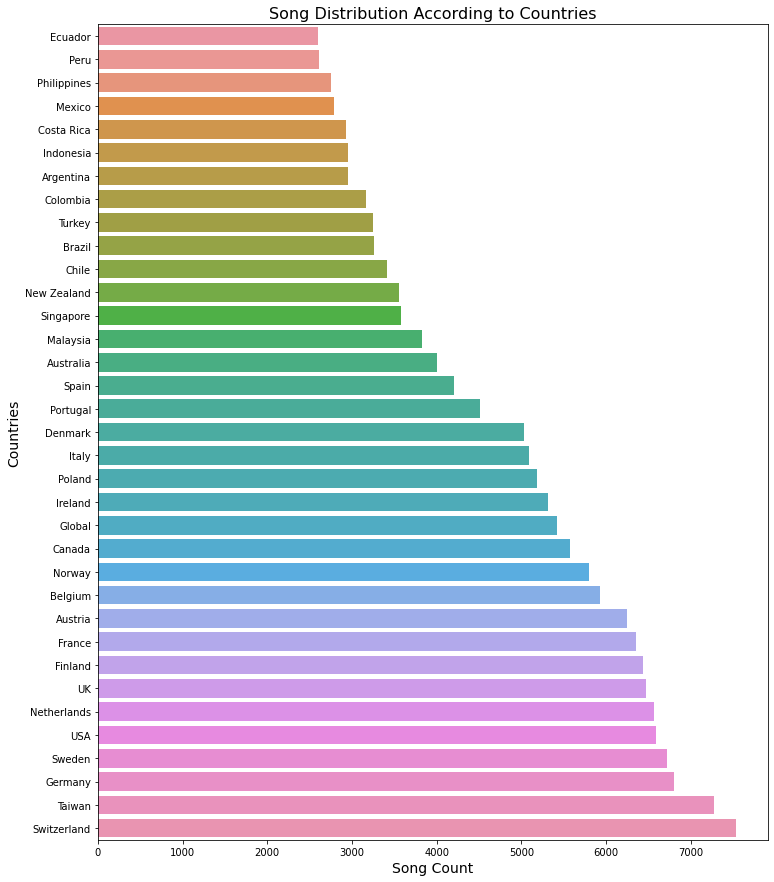

In [ ]:
plt.figure(figsize=(12, 15))
sns.countplot(data=df,y="country", order = df['country'].value_counts().sort_values().index)
plt.title('Song Distribution According to Countries', fontsize = 16)
plt.xlabel("Song Count", fontsize = 14)
plt.ylabel("Countries", fontsize = 14)

In [ ]:
order = df.groupby(["country"])["popularity"].mean().sort_values().index

Text(0, 0.5, 'Countries')

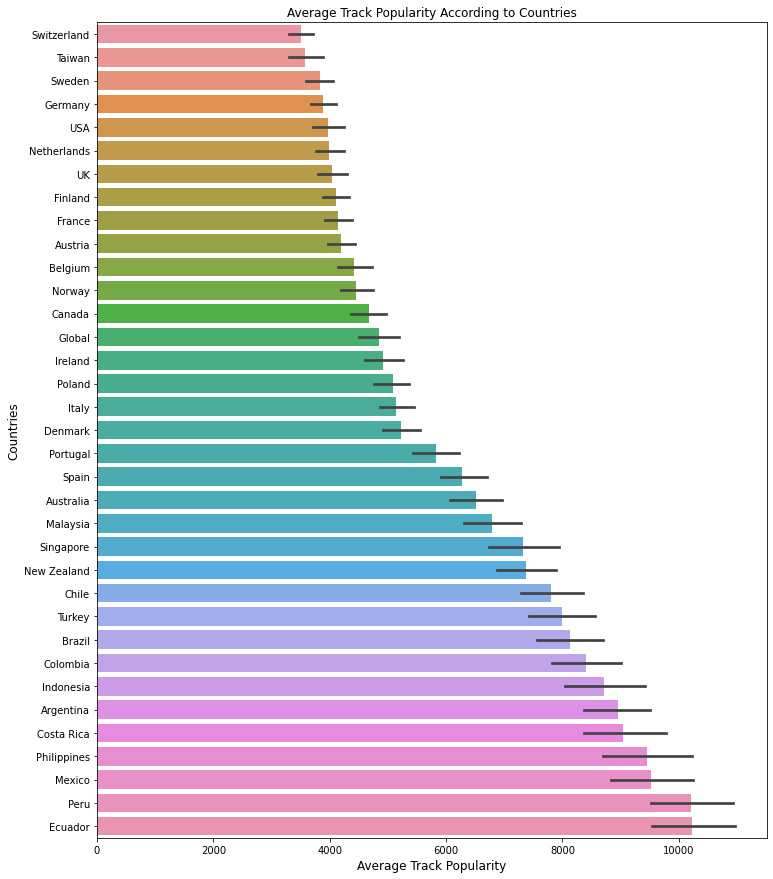

In [ ]:
plt.figure(figsize=(12, 15))
sns.barplot(data=df, x="popularity", y="country", estimator=np.mean, order=order)
plt.title('Average Track Popularity According to Countries')
plt.xlabel("Average Track Popularity", fontsize = 12)
plt.ylabel("Countries", fontsize = 12)

In [ ]:
df.country.unique()

array(['Global', 'USA', 'Argentina', 'Belgium', 'Switzerland', 'Chile',
       'Colombia', 'Costa Rica', 'Germany', 'Ecuador', 'Spain', 'Italy',
       'Mexico', 'Peru', 'Portugal', 'Taiwan', 'UK', 'Austria',
       'Australia', 'Canada', 'Finland', 'France', 'Indonesia', 'Ireland',
       'Malaysia', 'Netherlands', 'Norway', 'New Zealand', 'Philippines',
       'Poland', 'Sweden', 'Singapore', 'Turkey', 'Brazil', 'Denmark'],
      dtype=object)

In [ ]:
unique_countries = df.groupby("country")['popularity'].count()
unique_countries

country
Argentina      2957
Australia      4003
Austria        6252
Belgium        5931
Brazil         3257
Canada         5576
Chile          3417
Colombia       3160
Costa Rica     2927
Denmark        5026
Ecuador        2603
Finland        6436
France         6355
Germany        6797
Global         5423
Indonesia      2955
Ireland        5312
Italy          5087
Malaysia       3825
Mexico         2789
Netherlands    6570
New Zealand    3558
Norway         5800
Peru           2606
Philippines    2748
Poland         5184
Portugal       4513
Singapore      3573
Spain          4203
Sweden         6717
Switzerland    7531
Taiwan         7278
Turkey         3246
UK             6472
USA            6594
Name: popularity, dtype: int64

In [ ]:
unique_countries = pd.DataFrame({'country':unique_countries.index, 'count':unique_countries.values})

In [ ]:
unique_countries

,country,count
0,Argentina,2957
1,Australia,4003
2,Austria,6252
3,Belgium,5931
4,Brazil,3257
5,Canada,5576
6,Chile,3417
7,Colombia,3160
8,Costa Rica,2927
9,Denmark,5026


In [ ]:
from geopy.geocoders import Nominatim

latitude = []
longitude = []
geolocator = Nominatim(user_agent="my-app")

for i in unique_countries['country']:
    location = geolocator.geocode(i)
    latitude.append(location.latitude)
    longitude.append(location.longitude)

In [ ]:
data = pd.DataFrame({
   'lat':latitude,
   'lon':longitude,
   'country':unique_countries['country'],
    'count':unique_countries['count']
})

In [ ]:
data

,lat,lon,country,count
0,-34.996496,-64.967282,Argentina,2957
1,-24.776109,134.755000,Australia,4003
2,47.593970,14.124560,Austria,6252
3,50.640281,4.666715,Belgium,5931
4,-10.333333,-53.200000,Brazil,3257
5,61.066692,-107.991707,Canada,5576
6,-31.761336,-71.318770,Chile,3417
7,4.099917,-72.908813,Colombia,3160
8,10.273563,-84.073910,Costa Rica,2927
9,55.670249,10.333328,Denmark,5026


In [ ]:
import folium

 
m = folium.Map(location=[20,0], tiles="OpenStreetMap", zoom_start=2)
 
    
for i in range(0,len(data)):
    folium.Circle(
      location=[data.iloc[i]['lat'], data.iloc[i]['lon']],
      popup=data.iloc[i]['country'],
      radius=float(data.iloc[i]['count'])*80,
      color='#1db954',
      fill=True,
   ).add_to(m)
    
m


**Genre Trends Per Country**

Also, when we review the genres listened to in the countries with a treemap, while pop is the most popular genre in Europe, North America and Asia-Pacific countries, Latin is the most popular genre in Latin American countries.

In [ ]:
fig = px.treemap(df,path=['country','genre'],values=df['popularity'])

fig.show()

In [ ]:
fig = px.treemap(df,path=['genre', 'sub_genre'],values=df['popularity'])

fig.show()

In [ ]:
canada = df[df['country']=='Canada']
chile = df[df['country']=='Chile']
new_zealand = df[df['country']=='New Zealand']
poland = df[df['country']=='Poland']


**North America Country Analysis**

**Most Popular Artists, Genres, Subgenres, and Keys in Canada**

In [ ]:
fig1 = px.bar(x=canada.groupby('genre').size().sort_values(ascending=False)[:10].index,y=canada.groupby('genre').size().sort_values(ascending=False)[:10].values)
fig2= px.bar(x=canada.groupby('sub_genre').size().sort_values(ascending=False)[:10].index,y=canada.groupby('sub_genre').size().sort_values(ascending=False)[:10].values)
fig3= px.bar(x=canada.groupby('artist').size().sort_values(ascending=False)[:10].index,y=canada.groupby('artist').size().sort_values(ascending=False)[:10].values)
fig4= px.bar(x=canada.groupby('mapped_key').size().sort_values(ascending=False)[:10].index,y=canada.groupby('mapped_key').size().sort_values(ascending=False)[:10].values)

#getting the traces out of it.
trace1 = fig1['data'][0]
trace2 = fig2['data'][0]
trace3 = fig3['data'][0]
trace4 = fig4['data'][0]

#making a subplot having two rows and two columns.
fig = make_subplots(rows = 1, cols =4 , shared_xaxes = False,subplot_titles=("Most Occurring Genres in Canada", "Most Occurring Subgenres in Canada", "Most Occurring Artist in Canada", "Most Occurring Keys in Canada"))

#adding traces in the figure
fig.add_trace(trace1, row = 1, col = 1)
fig.add_trace(trace2, row = 1, col = 2)
fig.add_trace(trace3, row = 1, col = 3)
fig.add_trace(trace4, row = 1, col = 4)
fig.update_layout(height=400, width=1600,plot_bgcolor='#F5FFFA')

fig.update_xaxes(title_text="Genre", row = 1, col = 1)
fig.update_yaxes(title_text="Song Count", range=[0, 2000],  row = 1, col = 1)
fig.update_xaxes(title_text="Subgenre", row = 1, col = 2)
fig.update_yaxes(title_text="Song Count", range=[0, 1000], row = 1, col = 2)
fig.update_xaxes(title_text="Artist", row = 1, col = 3)
fig.update_yaxes(title_text="Song Count", range=[0, 100], row = 1, col = 3)
fig.update_xaxes(title_text="Key", row = 1, col = 4)
fig.update_yaxes(title_text="Song Count", range=[0, 800], row = 1, col = 4)


fig.show()

**Latin America Country Analysis**

**Most Popular Artists, Genres, Subgenres, and Keys in Chile**

In [ ]:
fig1 = px.bar(x=chile.groupby('genre').size().sort_values(ascending=False)[:10].index,y=chile.groupby('genre').size().sort_values(ascending=False)[:10].values)
fig2= px.bar(x=chile.groupby('sub_genre').size().sort_values(ascending=False)[:10].index,y=chile.groupby('sub_genre').size().sort_values(ascending=False)[:10].values)
fig3= px.bar(x=chile.groupby('artist').size().sort_values(ascending=False)[:10].index,y=chile.groupby('artist').size().sort_values(ascending=False)[:10].values)
fig4= px.bar(x=chile.groupby('mapped_key').size().sort_values(ascending=False)[:10].index,y=chile.groupby('mapped_key').size().sort_values(ascending=False)[:10].values)

#getting the traces out of it.
trace1 = fig1['data'][0]
trace2 = fig2['data'][0]
trace3 = fig3['data'][0]
trace4 = fig4['data'][0]

#making a subplot having two rows and two columns.
fig = make_subplots(rows = 1, cols =4 , shared_xaxes = False,subplot_titles=("Most Occurring Genres in Chile", "Most Occurring Subgenres in Chile", "Most Occurring Artist in Chile", "Most Occurring Keys in Chile"))

#adding traces in the figure
fig.add_trace(trace1, row = 1, col = 1)
fig.add_trace(trace2, row = 1, col = 2)
fig.add_trace(trace3, row = 1, col = 3)
fig.add_trace(trace4, row = 1, col = 4)
fig.update_layout(height=400, width=1600,plot_bgcolor='#F5FFFA')

fig.update_xaxes(title_text="Genre", row = 1, col = 1)
fig.update_yaxes(title_text="Song Count", range=[0, 2000],  row = 1, col = 1)
fig.update_xaxes(title_text="Subgenre", row = 1, col = 2)
fig.update_yaxes(title_text="Song Count", range=[0, 1000], row = 1, col = 2)
fig.update_xaxes(title_text="Artist", row = 1, col = 3)
fig.update_yaxes(title_text="Song Count", range=[0, 100], row = 1, col = 3)
fig.update_xaxes(title_text="Key", row = 1, col = 4)
fig.update_yaxes(title_text="Song Count", range=[0, 800], row = 1, col = 4)



fig.show()

**Asia-Pacific Country Analysis**

**Most Popular Artists, Genres, Subgenres, and Keys in New Zealand**

In [ ]:
fig1 = px.bar(x=new_zealand.groupby('genre').size().sort_values(ascending=False)[:10].index,y=new_zealand.groupby('genre').size().sort_values(ascending=False)[:10].values)
fig2= px.bar(x=new_zealand.groupby('sub_genre').size().sort_values(ascending=False)[:10].index,y=new_zealand.groupby('sub_genre').size().sort_values(ascending=False)[:10].values)
fig3= px.bar(x=new_zealand.groupby('artist').size().sort_values(ascending=False)[:10].index,y=new_zealand.groupby('artist').size().sort_values(ascending=False)[:10].values)
fig4= px.bar(x=new_zealand.groupby('mapped_key').size().sort_values(ascending=False)[:10].index,y=new_zealand.groupby('mapped_key').size().sort_values(ascending=False)[:10].values)

#getting the traces out of it.
trace1 = fig1['data'][0]
trace2 = fig2['data'][0]
trace3 = fig3['data'][0]
trace4 = fig4['data'][0]

#making a subplot having two rows and two columns.
fig = make_subplots(rows = 1, cols =4 , shared_xaxes = False,subplot_titles=("Most Occurring Genres in New Zealand", "Most Occurring Subgenres in New Zealand", "Most Occurring Artist in New Zealand","Most Occurring Keys in New Zealand"))

#adding traces in the figure
fig.add_trace(trace1, row = 1, col = 1)
fig.add_trace(trace2, row = 1, col = 2)
fig.add_trace(trace3, row = 1, col = 3)
fig.add_trace(trace4, row = 1, col = 4)
fig.update_layout(height=400, width=1600,plot_bgcolor='#F5FFFA')

fig.update_xaxes(title_text="Genre", row = 1, col = 1)
fig.update_yaxes(title_text="Song Count", range=[0, 2000],  row = 1, col = 1)
fig.update_xaxes(title_text="Subgenre", row = 1, col = 2)
fig.update_yaxes(title_text="Song Count", range=[0, 1000], row = 1, col = 2)
fig.update_xaxes(title_text="Artist", row = 1, col = 3)
fig.update_yaxes(title_text="Song Count", range=[0, 100], row = 1, col = 3)
fig.update_xaxes(title_text="Key", row = 1, col = 4)
fig.update_yaxes(title_text="Song Count", range=[0, 800], row = 1, col = 4)



fig.show()

**Europe Country Analysis**

**Most Popular Artists, Genres, Subgenres, and Keys in Poland**

In [ ]:
fig1 = px.bar(x=poland.groupby('genre').size().sort_values(ascending=False)[:10].index,y=poland.groupby('genre').size().sort_values(ascending=False)[:10].values)
fig2= px.bar(x=poland.groupby('sub_genre').size().sort_values(ascending=False)[:10].index,y=poland.groupby('sub_genre').size().sort_values(ascending=False)[:10].values)
fig3= px.bar(x=poland.groupby('artist').size().sort_values(ascending=False)[:10].index,y=poland.groupby('artist').size().sort_values(ascending=False)[:10].values)
fig4= px.bar(x=poland.groupby('mapped_key').size().sort_values(ascending=False)[:10].index,y=poland.groupby('mapped_key').size().sort_values(ascending=False)[:10].values)

#getting the traces out of it.
trace1 = fig1['data'][0]
trace2 = fig2['data'][0]
trace3 = fig3['data'][0]
trace4 = fig4['data'][0]

#making a subplot having two rows and two columns.
fig = make_subplots(rows = 1, cols =4 , shared_xaxes = False,subplot_titles=("Most Occurring Genres in Poland", "Most Occurring Subgenres in Poland", "Most Occurring Artist in Poland","Most Occurring Keys in Poland"))

#adding traces in the figure
fig.add_trace(trace1, row = 1, col = 1)
fig.add_trace(trace2, row = 1, col = 2)
fig.add_trace(trace3, row = 1, col = 3)
fig.add_trace(trace4, row = 1, col = 4)
fig.update_layout(height=400, width=1600,plot_bgcolor='#F5FFFA')

fig.update_xaxes(title_text="Genre", row = 1, col = 1)
fig.update_yaxes(title_text="Song Count", range=[0, 2000],  row = 1, col = 1)
fig.update_xaxes(title_text="Subgenre", row = 1, col = 2)
fig.update_yaxes(title_text="Song Count", range=[0, 1000], row = 1, col = 2)
fig.update_xaxes(title_text="Artist", row = 1, col = 3)
fig.update_yaxes(title_text="Song Count", range=[0, 100], row = 1, col = 3)
fig.update_xaxes(title_text="Key", row = 1, col = 4)
fig.update_yaxes(title_text="Song Count", range=[0, 800], row = 1, col = 4)




fig.show()